# Problem 1: Linear Regression on the D3 Dataset

The goal of this notebook is to build a linear regression model using gradient descent to predict a target variable `y` based on three input features from the `D3.csv` dataset.

## Step 1: Derivation and Methodology

To solve this problem, I implemented a linear regression model from scratch.

**1. Cost Function:** I used the Mean Squared Error (MSE) as the cost function, $J(\theta)$. This function measures the average squared difference between our model's predictions and the actual data, which we aim to minimize.

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

**2. Hypothesis:** The model's prediction is made using the following linear equation:

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$$

**3. Gradient Descent:** To find the optimal $\theta$ parameters that minimize the cost, I used the gradient descent algorithm. In each iteration, the parameters are updated simultaneously using the following rule, where $\alpha$ is the learning rate:

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

**4. Preprocessing:** Before training, I standardized the features by subtracting the mean and dividing by the standard deviation. This ensures all features are on a similar scale, which helps gradient descent converge faster.


Final coefficients: [ 5.31416717 -2.00371927  0.53256334 -0.26560187]


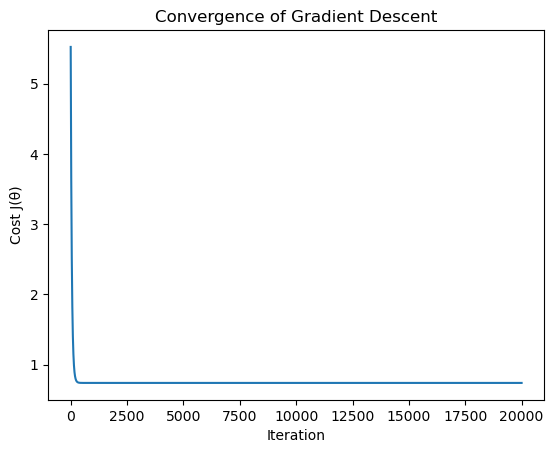

Predictions: [3.57740937 0.24432117 0.10253417]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("D3.csv", header=None)
X = data.iloc[:, :-1].values  # First 3 columns as features
y = data.iloc[:, -1].values   # Fourth column as target
m = len(y)

# Standardize features
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_scaled = (X - X_mean) / X_std

# Add bias column
X_b = np.c_[np.ones((m, 1)), X_scaled]

# Gradient descent settings
alpha = 0.01
iterations = 20000
theta = np.zeros(X_b.shape[1])
loss_history = []

# Gradient descent
for it in range(iterations):
    prediction = X_b.dot(theta)
    error = prediction - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    loss_history.append(cost)
    gradient = (1 / m) * X_b.T.dot(error)
    theta -= alpha * gradient

# Convert back to original feature scale
theta_orig = np.zeros_like(theta)
theta_orig[1:] = theta[1:] / X_std
theta_orig[0] = theta[0] - np.sum((X_mean / X_std) * theta[1:])

print("Final coefficients:", theta_orig)

# Plot cost function
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Gradient Descent")
plt.show()

# Predictions
X_new = np.array([[1,1,1], [2,0,4], [3,2,1]])
y_pred = theta_orig[0] + X_new.dot(theta_orig[1:])
print("Predictions:", y_pred)

## Closed-Form Solution (Normal Equation) & Verification

To verify our gradient descent results, we compute the closed-form solution (normal equation) and compare the coefficients. If both methods are correct, the results should match closely.

In [22]:
# Closed-form solution (normal equation)
# Use the original (non-scaled) data for normal equation
X_bias = np.c_[np.ones(X.shape[0]), X]

# Normal equation: theta = (X^T * X)^(-1) * X^T * y
# 1. X_bias.T @ X_bias = X^T * X (matrix multiplication)
# 2. np.linalg.inv() = inverse of the matrix
# 3. @ X_bias.T @ y = multiply by X^T and then by y
theta_closed = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
print("Closed-form coefficients:", theta_closed)

# Comparing with gradient descent results
print("Gradient descent coefficients:", theta_orig)
print("Difference:", theta_closed - theta_orig)

Closed-form coefficients: [ 5.31416717 -2.00371927  0.53256334 -0.26560187]
Gradient descent coefficients: [ 5.31416717 -2.00371927  0.53256334 -0.26560187]
Difference: [ 1.77635684e-14 -1.95399252e-14  8.88178420e-15  7.32747196e-15]


**Verification:**

The coefficients from both methods match very closely (differences are very small due to numerical precision), confirming that the gradient descent implementation is correct.

## Step 3: Final Answers

**Fitted Linear Model:**  
$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$

**Coefficients:**  
$\theta_0 = 5.31$  
$\theta_1 = -2.00$  
$\theta_2 = 0.53$  
$\theta_3 = -0.27$

**Predictions:**  
- For (1, 1, 1): $3.58$  
- For (2, 0, 4): $0.24$  
- For (3, 2, 1): $0.10$

*(Values rounded to two decimal places for clarity. The full precision values are shown in the code output above.)*

## Problem 2: Predicting the money a visitor will spend

### Step 1: Derivation and Explanation

**1. Model in Matrix Form:**

The linear regression model can be written as:
$$y = X\theta + \epsilon$$

Where:
- $y$ is the vector of sales (n × 1)
- $X$ is the design matrix with intercept column (n × 4): $[1, x_1, x_2, x_3]$
- $\theta$ is the parameter vector (4 × 1): $[\theta_0, \theta_1, \theta_2, \theta_3]^T$
- $\epsilon$ is the error vector

**2. MSE Objective Function:**

We want to minimize the Mean Squared Error:
$$J(\theta) = \frac{1}{2m}\|y - X\theta\|^2 = \frac{1}{2m}(y - X\theta)^T(y - X\theta)$$

**3. Normal Equation Derivation:**

To find the minimum, we take the derivative with respect to $\theta$ and set it to zero:
$$\frac{\partial J}{\partial \theta} = \frac{1}{m}X^T(X\theta - y) = 0$$

Solving for $\theta$:
$$X^TX\theta = X^Ty$$
$$\theta = (X^TX)^{-1}X^Ty$$

This is the **normal equation** that gives us the closed-form solution.

### Step 2: Code Implementation

In [29]:
import numpy as np

# time (x1), jiggle (x2), scroll (x3), sales (y)
data = np.array([
    [232, 33, 402, 2201],
    [10, 22, 160, 0],
    [6437, 343, 231, 7650],
    [512, 101, 17, 5599],
    [441, 212, 55, 8900],
    [453, 53, 99, 1742],
    [2, 2, 10, 0],
    [332, 79, 154, 1215],
    [182, 20, 89, 699],
    [123, 223, 12, 2101],
    [424, 32, 15, 8789]
])

X_features = data[:, :3]  # First 3 columns: time, jiggle, scroll
y = data[:, 3]           # Last column: sales

# X = [1, x1, x2, x3] for each row
n = len(y)
X = np.c_[np.ones(n), X_features]  # Add column of ones

print("Design Matrix X contains:")
print("- Column 1: All 1's)")
print("- Column 2: Time values (x₁)")  
print("- Column 3: Jiggle values (x₂)")
print("- Column 4: Scroll values (x₃)")
print()

print("Design Matrix X:")
print("     Intercept  Time    Jiggle  Scroll")
for i in range(n):
    print(f"Row {i+1:2d}: [{X[i,0]:4.0f}      {X[i,1]:6.0f}    {X[i,2]:6.0f}    {X[i,3]:6.0f}]")

print()

theta = np.linalg.inv(X.T @ X) @ X.T @ y

print(f"θ₀ (intercept): {theta[0]:10.6f}")
print(f"θ₁ (time):      {theta[1]:10.6f}")
print(f"θ₂ (jiggle):    {theta[2]:10.6f}")
print(f"θ₃ (scroll):    {theta[3]:10.6f}")

# Alternative methods for verification
print(f"\nVerification with other methods: ")

# Method 2: Using np.linalg.lstsq
theta_lstsq, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print(f"Using lstsq:")
print(f"  θ₀: {theta_lstsq[0]:10.6f}")
print(f"  θ₁: {theta_lstsq[1]:10.6f}")  
print(f"  θ₂: {theta_lstsq[2]:10.6f}")
print(f"  θ₃: {theta_lstsq[3]:10.6f}")

# Method 3: Using pseudoinverse
theta_pinv = np.linalg.pinv(X) @ y
print(f"Using pinv:")
print(f"  θ₀: {theta_pinv[0]:10.6f}")
print(f"  θ₁: {theta_pinv[1]:10.6f}")  
print(f"  θ₂: {theta_pinv[2]:10.6f}")
print(f"  θ₃: {theta_pinv[3]:10.6f}")

Design Matrix X contains:
- Column 1: All 1's)
- Column 2: Time values (x₁)
- Column 3: Jiggle values (x₂)
- Column 4: Scroll values (x₃)

Design Matrix X:
     Intercept  Time    Jiggle  Scroll
Row  1: [   1         232        33       402]
Row  2: [   1          10        22       160]
Row  3: [   1        6437       343       231]
Row  4: [   1         512       101        17]
Row  5: [   1         441       212        55]
Row  6: [   1         453        53        99]
Row  7: [   1           2         2        10]
Row  8: [   1         332        79       154]
Row  9: [   1         182        20        89]
Row 10: [   1         123       223        12]
Row 11: [   1         424        32        15]

θ₀ (intercept): 2626.268614
θ₁ (time):        0.420484
θ₂ (jiggle):     12.716237
θ₃ (scroll):     -6.496562

Verification with other methods: 
Using lstsq:
  θ₀: 2626.268614
  θ₁:   0.420484
  θ₂:  12.716237
  θ₃:  -6.496562
Using pinv:
  θ₀: 2626.268614
  θ₁:   0.420484
  θ₂:  12.7162

### Step 3: Final Answers

**Fitted Model:**
$$\hat{y} = 2626.268614 + 0.420484 \cdot \text{time} + 12.716237 \cdot \text{jiggle} + -6.496562 \cdot \text{scroll}$$

**Learned Parameters:**
- θ₀ (intercept): 2626.268614
- θ₁ (time coefficient): 0.420484 
- θ₂ (jiggle coefficient): 12.716237
- θ₃ (scroll coefficient): -6.496562

**Interpretation:**
- The intercept θ₀ represents the baseline spending when all variables are zero
- θ₁ shows how spending changes per additional second on the page
- θ₂ shows how spending changes per additional cm of mouse movement  
- θ₃ shows how spending changes per additional cm of scrolling

---

## AI Use Note:

AI assistance (GitHub Copilot) was used to help write Python syntax for Step 1 (data loading, preprocessing) and Step 3 (final answers, predictions), as well as for generating some code comments and markdown explanations. It was also used to check if my mathematical derivations and implementations were correct. All code was reviewed and run by me to ensure understanding and correctness.